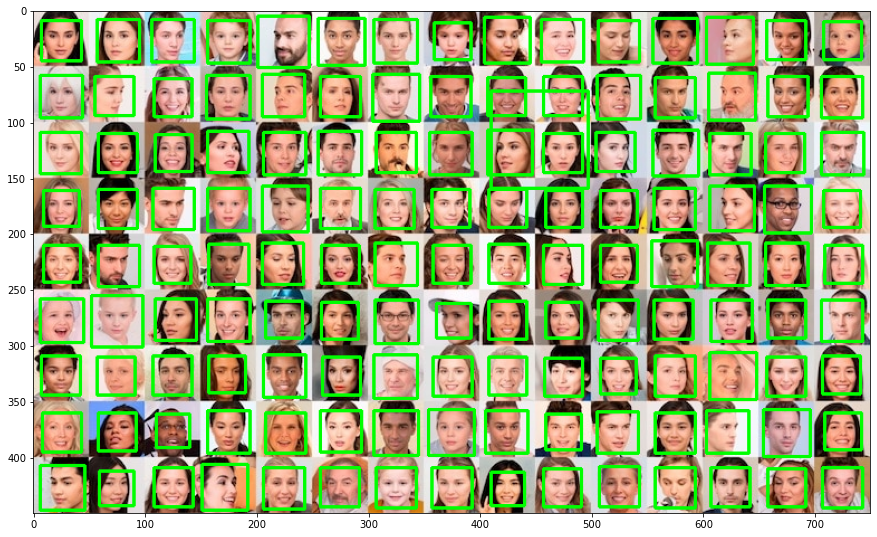

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')


img=cv2.imread('faces.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.03,minNeighbors=5,minSize=(1,1))


for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    

plt.figure(figsize=(15,12))
plt.imshow(img[:,:,::-1])





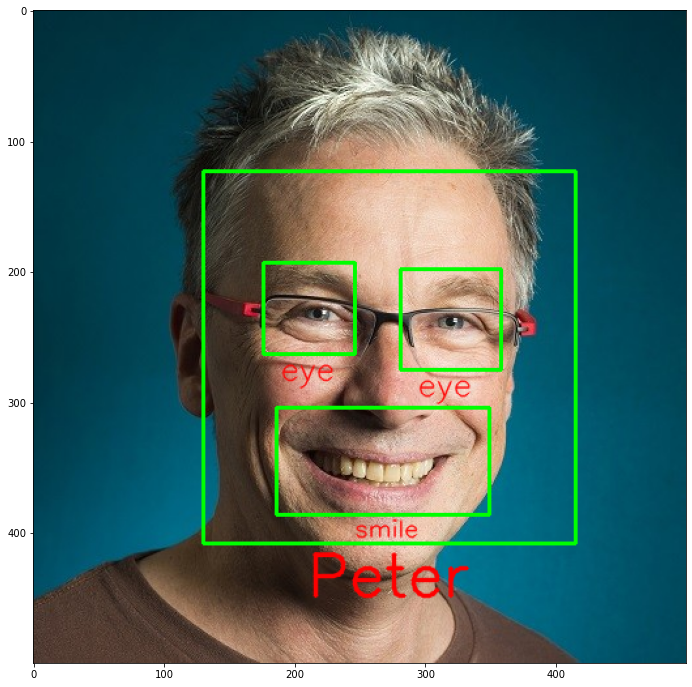

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')


img=cv2.imread('d42473-018-00009-z_15736222.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4,minSize=(100,100))
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    tex = cv2.putText(img , "Peter" ,(x+80,y+h+40) ,cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),2,cv2.LINE_AA)
    
    
    face=gray[y:y+h,x:x+w]
    eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.01,minNeighbors=1,minSize=(1,70))
    for x2,y2,w2,h2 in eyes:
        cv2.rectangle(img,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),2)
        tex = cv2.putText(img , "eye" ,(x+x2+13,y+y2+h2+20) ,cv2.FONT_HERSHEY_SIMPLEX,.8,(0,0,255),1,cv2.LINE_AA)
    
    
    face=gray[y:y+h,x:x+w]
    smile=smileClassifier.detectMultiScale(face,scaleFactor=1.1,minNeighbors=10,minSize=(1,70))
    for x2,y2,w2,h2 in smile:
        cv2.rectangle(img,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),2)
        tex = cv2.putText(img , "smile" ,(x+x2+60,y+y2+h2+17) ,cv2.FONT_HERSHEY_SIMPLEX,.6,(0,0,255),1,cv2.LINE_AA)
        
        
plt.figure(figsize=(15,12))
plt.imshow(img[:,:,::-1])





In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


cap=cv2.VideoCapture(0)


faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')


while (cap.isOpened()):

    ret,frame=cap.read()

    if (ret):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=6,minSize=(30,30))
        for x,y,w,h in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),5)
            
            
            
            face=gray[y:y+h,x:x+w]
            smile=smileClassifier.detectMultiScale(face,scaleFactor=1.2,minNeighbors=20,minSize=(5,20))
            for x2,y2,w2,h2 in smile:
                cv2.rectangle(frame,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),2)
                tex = cv2.putText(frame , "smile" ,(x+x2+60,y+y2+h2+17) ,cv2.FONT_HERSHEY_SIMPLEX,.6,(0,0,255),1,cv2.LINE_AA)
        
        
            face=gray[y:y+h,x:x+w]
            eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.1,minNeighbors=20,minSize=(5,5))
            for (x2,y2,r,m) in eyes:
                a = int(x+x2+(r/2))
                b = int(y+y2+(r/2))
                R = int ((r)*2/3)
                cv2.circle(frame , (a,b) , R      , (0,255,0) , 1)
                tex = cv2.putText(frame , "eye" ,(x+x2+1,y+y2+h2+20) ,cv2.FONT_HERSHEY_SIMPLEX,.4,(0,0,255),1,cv2.LINE_AA)
                
            

    cv2.imshow("my_image",frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

        
        